In [86]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline 
import matplotlib.pyplot as plt

In [87]:
houses_df = pd.read_csv("train.csv")
#houses_df.head()

In [137]:
# discretize sale price into 5 equal bins
#houses_df['SalePriceBinned'] = pd.cut(houses_df['SalePrice'], 5, labels = [1,2,3,4,5])
#houses_df.head()

In [138]:
# plot some features on axes 
#ax = houses_df[houses_df['SalePriceBinned'] == 4][0:200].plot(kind='scatter', x='YrSold', y='LotArea', color='DarkBlue', label='expensive');
#houses_df[houses_df['SalePriceBinned'] == 1][0:200].plot(kind='scatter', x='YrSold', y='LotArea', color='Red', label='cheap', ax=ax);
#plt.show()

In [4]:
#houses_df.dtypes

In [88]:
columns_to_keep = ['Id',
                   'MSSubClass', 
                   'LotArea', 
                   'OverallQual', 
                   'OverallCond', 
                   'YearBuilt' ,
                   'YearRemodAdd', 
                    '1stFlrSF',
                    '2ndFlrSF',
                   'LowQualFinSF',
                    'GrLivArea',
                    'FullBath',
                    'HalfBath',
                    'BedroomAbvGr',
                    'KitchenAbvGr',
                    'TotRmsAbvGrd',
                    'Fireplaces',
                    'WoodDeckSF',
                    'OpenPorchSF',
                    'EnclosedPorch',
                    '3SsnPorch',
                    'ScreenPorch',
                    'PoolArea',
                    'MiscVal',
                    'MoSold',
                    'YrSold']

#feature_df = houses_df.select_dtypes(include=['int64'])
X = np.asarray(houses_df.loc[:, columns_to_keep])
X[0]

array([   1,   60, 8450,    7,    5, 2003, 2003,  856,  854,    0, 1710,
          2,    1,    3,    1,    8,    0,    0,   61,    0,    0,    0,
          0,    0,    2, 2008])

In [89]:
y = np.asarray(houses_df['SalePrice'].values.astype(int))
y [0:5]

array([208500, 181500, 223500, 140000, 250000])

In [90]:
# split the dataset in train and validation sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1168, 26) (1168,)
Test set: (292, 26) (292,)


In [91]:
# set the parameters by cross-validation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('estimator', SVR())])
param_grid=dict(estimator__kernel = ['linear', 'rbf'],
                estimator__C = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 10],
                estimator__epsilon = [0.05, 0.75, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
                )

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train.ravel())
print(search.best_params_)


/home/kumo/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'estimator__C': 5, 'estimator__epsilon': 0.1, 'estimator__kernel': 'rbf'}


In [78]:
# prediction for validation set

yhat = y_scaler.inverse_transform(search.predict(X_test))
yhat[0:5]

array([236166.6004085 , 209051.19436472, 152231.50882933, 164655.28304064,
        86890.91566247])

In [30]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVR

#pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', SVR(kernel='rbf'))])
#y_scaler = StandardScaler()
#y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
#pipeline.fit(X_train, y_train.ravel())
#yhat = y_scaler.inverse_transform(pipeline.predict(X_test))
#yhat[0:5]

array([249892.49298713, 189794.67176081, 167234.69934568, 174552.35904342,
        95259.2634775 ])

292 292
27838.31938709651


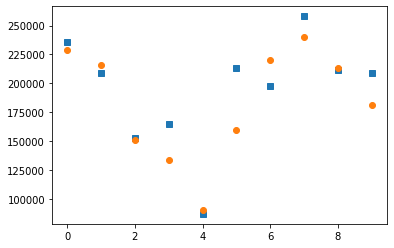

In [79]:
print(y_test.size, yhat.size)

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, yhat))
print(rms)

x = np.arange(10)
plt.plot(x, yhat[0:10], marker = 's', linestyle = 'None')
plt.plot(x, y_test[0:10], marker = 'o', linestyle = 'None')
plt.show()

In [92]:
forecast_df = pd.read_csv("test.csv")
forecast_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [93]:
# prediction based on provided test series
X_test = forecast_df.loc[:, columns_to_keep]
X_test.shape
yhat = y_scaler.inverse_transform(search.predict(X_test))
yhat[0:5]
pd.DataFrame(yhat).to_csv('yhat.csv')

In [96]:
print(yhat)


[125873.93196804 213514.00945187 188973.66818518 ... 153586.35577687
 130323.04721209 203357.68838445]
